<a href="https://colab.research.google.com/github/rafaelfaustini/gestaoconhecimento/blob/master/Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rafael Faustini - 0050014724

In [0]:
import pandas as pd
from sklearn.datasets import load_boston

In [0]:
dataset = load_boston()
data = pd.DataFrame(dataset.data)
data.columns = dataset.feature_names

Mostre os primeiros registros da tabela

In [13]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Observações(linhas) possui nessa base? Quantas Colunas?

In [14]:
data.shape

(506, 13)

Quantas Features Possui?

In [15]:
len(dataset.feature_names)

13

Qual é o campo Target(respostas) dessa base?

In [16]:
data['MEDV'] = dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Usando a biblioteca de visualização seaborn, plote o gráfico que mostra a relação entre as features e responses

In [17]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


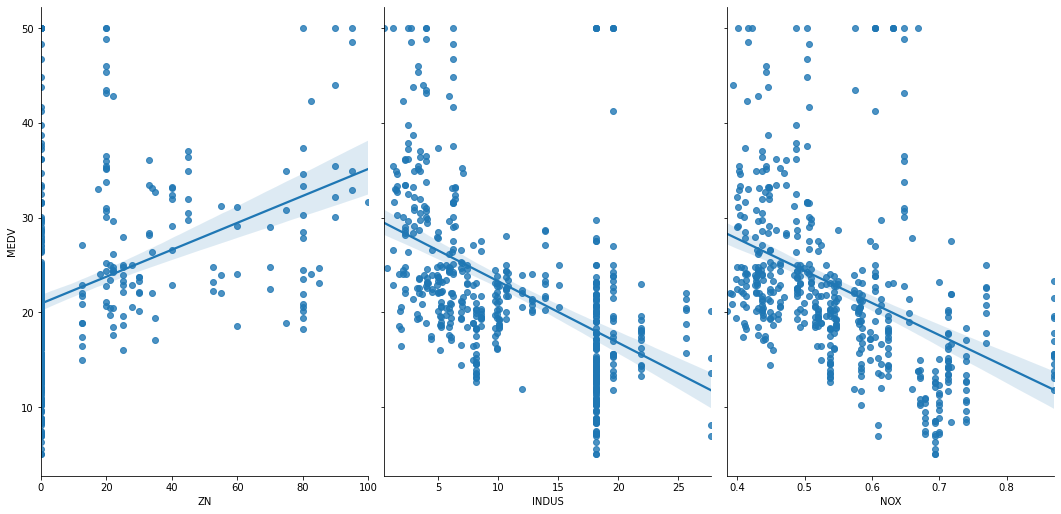

In [18]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['ZN','INDUS','NOX'], y_vars='MEDV', height=7, aspect=0.7, kind='reg')

Prepare X e y usando o pandas

In [23]:

X = data[data.columns]
y = data['MEDV']
y = data.MEDV
X.head()
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

Qual o tipo de dados de X e y?

In [21]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Sobre o que se trata essa base de dados? Que tipo de informações ela guarda?


Dados imobiliários de Boston. Dados como o preço das casas em Boston

Gere um X de treino e y de treino, X de teste e y da base (Split Train/Test)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Qual o percentual gerado para criar o conjunto de treino e o conjunto de teste?

In [29]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(379, 14)
(379,)
(127, 14)
(127,)


Usando modelo de regressão linear do sklearn, treine o modelo com o X e y de treino

In [30]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Imprima os atributos de "intercept" e "coefficients" que foram gerados

In [31]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

1.5276668818842154e-13
[ 5.12038746e-16  6.38378239e-16  2.14531084e-15 -1.47284757e-14
 -2.23203143e-14 -1.11235755e-15 -1.53089347e-16 -5.47901568e-16
 -2.17924637e-16 -1.00613962e-16 -3.01679254e-16 -2.77555756e-16
 -1.43982049e-16  1.00000000e+00]


Imprima o par "feature names" com os "coefficients"

In [32]:
# pair the feature names with the coefficients
feature_cols = dataset.feature_names
list(zip(feature_cols, linreg.coef_))

[('CRIM', 5.120387459956797e-16),
 ('ZN', 6.38378239159465e-16),
 ('INDUS', 2.1453108386970676e-15),
 ('CHAS', -1.472847570223616e-14),
 ('NOX', -2.2320314270896785e-14),
 ('RM', -1.1123575476522374e-15),
 ('AGE', -1.5308934675495323e-16),
 ('DIS', -5.479015678655497e-16),
 ('RAD', -2.179246366695864e-16),
 ('TAX', -1.0061396160665481e-16),
 ('PTRATIO', -3.016792544940916e-16),
 ('B', -2.7755575615628914e-16),
 ('LSTAT', -1.43982048506075e-16)]

Faça uma previsão usando o conjunto de X de teste

In [33]:

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print(y_pred)

[28.2 23.9 16.6 22.  20.8 23.  27.9 14.5 21.5 22.6 23.7 31.2 19.3 19.4
 19.4 27.9 13.9 50.  24.1 14.6 16.2 15.6 23.8 25.  23.5  8.3 13.5 17.5
 43.1 11.5 24.1 18.5 50.  12.6 19.8 24.5 14.9 36.2 11.9 19.1 22.6 20.7
 30.1 13.3 14.6  8.4 50.  12.7 25.  18.6 29.8 22.2 28.7 23.8  8.1 22.2
  6.3 22.1 17.5 48.3 16.7 26.6  8.5 14.5 23.7 37.2 41.7 16.5 21.7 22.7
 23.  10.5 21.9 21.  20.4 21.8 50.  22.  23.3 37.3 18.  19.2 34.9 13.4
 22.9 22.5 13.  24.6 18.3 18.1 23.9 50.  13.6 22.9 10.9 18.9 22.4 22.9
 44.8 21.7 10.2 15.4 25.3 23.3  7.2 21.2 11.7 27.  29.6 26.5 43.5 23.6
 11.  33.4 36.  36.4 19.  20.2 34.9 50.  19.3 14.9 26.6 19.9 24.8 21.2
 23.9]


15-Mostre a margem de erro, usando o método "Root Mean Squared Error (RMSE)"



In [34]:

# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


Existe uma forma de melhorar essa margem para que fique menor? Se sim, como seria ?

In [36]:
import numpy as np
# create a Python list of feature names
feature_cols = ['MEDV']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.MEDV

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.0


Reduzindo o número de colunas